<a href="https://colab.research.google.com/github/Belal-AI/Rev-Projects/blob/main/XGBOOST_with_comput_class_weights(ODSC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.metrics import accuracy_score,precision_score,recall_score

Reading the Dataset

In [13]:
data=pd.read_csv("/content/telecom_churn.csv")

In [14]:
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

States feature is not just identification but its has symbols represents the states



In [16]:
np.unique(data['State'])

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

As long the International plan and Voice mail plan is binary values (yes and no) so we dont need to hotencode it  we can transform it by labelencodnign it

In [17]:
encoder=LabelEncoder()

In [18]:
data['International plan']=encoder.fit_transform(data['International plan'])
data['Voice mail plan']=encoder.fit_transform(data['Voice mail plan'])

In [19]:
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


Apply hot encoding for all the data with State coloum


In [21]:
target=data.iloc[:,-1]
data=pd.get_dummies(data=data.iloc[:,:-1],drop_first=True)

In [22]:
data

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,...,0,0,0,0,0,0,0,0,0,0
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,...,0,0,0,0,0,0,0,0,1,0
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,...,0,0,0,0,0,0,0,0,0,0
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data['target']=target

- Here we can catch it the data is imbalanced  
- So...how to solve it?

- Upsampling the minority class: This involves generating synthetic samples for the minority class to balance the dataset. One way to do this is by using the Synthetic Minority Oversampling Technique (SMOTE), which uses a nearest neighbors algorithm to create synthetic samples that are similar to the minority class. While this can improve model performance, it may also lead to overfitting if not done carefully.

- Downsampling the majority class: This involves removing samples from the majority class to balance the dataset. This can help prevent the model from being biased towards the majority class, but it may also reduce the overall size of the dataset and potentially reduce model performance.

- Using class weights: XGBoost allows us to specify class weights, which adjust the importance of each class during training. By increasing the weight of the minority class, we can give it more influence on the model’s predictions. We can either specify the class weights manually or use the “scale_pos_weight” parameter, which is calculated automatically based on the class balance.

- Using a different evaluation metric: In imbalanced datasets, the traditional evaluation metric of accuracy may not be the most appropriate. Instead, we can use metrics such as precision, recall, or the F1 score, which take into account the class balance. For example, the F1 score is a weighted average of precision and recall, with a higher weight given to the minority class. This can be a more informative metric for imbalanced datasets.

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Axes: xlabel='target', ylabel='Count'>

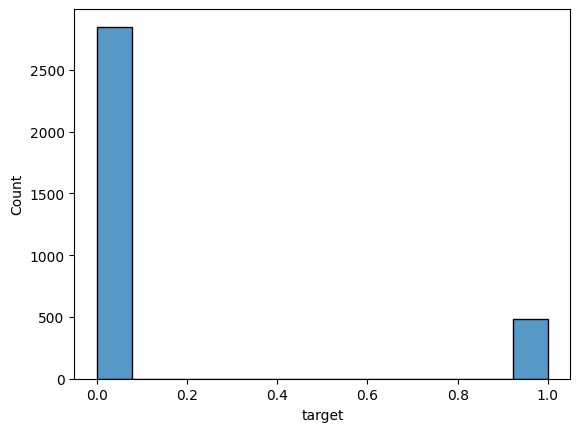

In [27]:
sn.histplot(data['target'])

- In our case we will try to use compute class weights

In [36]:
class_weights = compute_class_weight(class_weight='balanced',classes=np.unique(target),y=target)

In [37]:
class_weights

array([0.58473684, 3.45031056])

In [40]:
our_weights=dict(zip(np.unique(target),class_weights))

- in the dataset that imbalanced you should to care in sampling to that ..the sampling could be Stratified which is mean training and testeing percentage quantity is equal between classes

In [53]:
splits=StratifiedKFold(n_splits=3)
for trainidx,testidx in splits.split(data.iloc[:,:-1],data.iloc[:,-1]):
  trainx=data.iloc[trainidx,:-1]
  trainy=data.iloc[trainidx,-1]
  testx=data.iloc[testidx,:-1]
  y=data.iloc[testidx,-1]


In [47]:
trainx.shape

(2222, 68)

In [48]:
trainy.shape

(2222,)

In [50]:
model=xgb.XGBClassifier(class_weights=class_weights)

In [51]:
model.fit(trainx,trainy)

[23:57:45] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weights" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weights=array([0.58473684, 3.45031056]),
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [54]:
ypred=model.predict(testx)

- We doesn't depend on accuracy as a metric we also go to precision ad recall to check the effect of imbalanced data

In [57]:
accuracy_score(ypred,y)

0.9504950495049505

In [60]:
precision_score(ypred,y)

0.7080745341614907

In [61]:
recall_score(ypred,y)

0.9344262295081968